**Segundo Exercício Escolar de Introdução a Ciência dos Dados - Utilizando Rede Neural Convolucional para identificar predisposição de câncer no tecido humano.**
==================

**Abstract:** aplicação de uma Rede Neural Convolucional (CNN) para distinguir entre manchas de pele benignas e malignas, com potencial para desenvolver câncer. A abordagem proposta visa identificar padrões sutis em imagens de  tecido humano, oferecendo uma ferramenta promissora para a detecção precoce de predisposição ao câncer. O estudo serve como um segundo exercício escolar na área de Introdução à Ciência de Dados, demonstrando o poder das CNNs na análise de dados médicos.

**Linguagem:** Python

**Modelo**: Rede Neural Convolucional (CNN)

**Por** Lucas Victor Silva.

**Fonte dos dados:**

https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign?resource=download

***

## **Análise de Dados e Aprendizado de Máquina**

A **Análise de Dados** é uma prática que se concentra na aplicação de métodos estatísticos, técnicas de mineração de dados, aprendizado de máquina e ferramentas analíticas para extrair insights, padrões e conhecimento valioso de conjuntos de dados. Envolve a coleta, limpeza, transformação e interpretação de dados com o objetivo de tomar decisões informadas, fazer previsões, otimizar processos e resolver problemas complexos.

O **Aprendizado de Máquina** é a ciência que capacita os computadores a aprender como executar tarefas sem serem explicitamente programados para isso. Foca na geração de previsões precisas, minimizando o erro quadrático médio, mesmo diante de restrições computacionais.

Análise de Dados e o Aprendizado de Máquina reside na extração de conhecimento a partir dos dados. A Análise de Dados forma a base, envolvendo exploração, preparação e compreensão dos dados. O Aprendizado de Máquina utiliza esses dados para treinar modelos capazes de prever, classificar ou automatizar tarefas. **A Análise de Dados fornece insights iniciais, enquanto o Aprendizado de Máquina utiliza esses insights para criar sistemas inteligentes que tomam decisões ou previsões com base nos dados.**

## **Sobre a Base de Dados**

O câncer de pele é a malignidade humana mais comum, frequentemente diagnosticada por avaliação visual, começando com uma triagem clínica inicial, podendo ser seguida de análise dermatoscópica, biópsia e exame histopatológico. A classificação automatizada de lesões usando imagens é uma tarefa desafiadora devido à variabilidade refinada na aparência das lesões.

O conjunto de dados foi obtido do arquivo ISIC (Colaboração Internacional de Imagens de Pele). Consiste em 1.800 fotos de pintas benignas e 1.497 fotos de pintas classificadas como malignas. As imagens foram redimensionadas para RGB de baixa resolução (224x224x3). A tarefa deste núcleo é criar um modelo capaz de classificar visualmente uma mancha em benigna ou maligna.

Dada a equilibrada distribuição do conjunto de dados, o modelo será avaliado com base na métrica de precisão, expressa como **(TP + TN)/(ALL).**

***
## **Instalando e Impotando as Livrarias**

In [2]:
import random
import os
import glob
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support,
    accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, ConfusionMatrixDisplay
)
from scikitplot.metrics import plot_roc

**Bibliotecas usadas para implementação e análise da rede CCT**

**`tensorflow` e `tensorflow.keras`**: TensorFlow é uma biblioteca popular para aprendizado de máquina e deep learning.

**`tensorflow.keras.layers` e `tensorflow.keras.Sequential`**: São partes da API Keras que facilitam a construção e configuração de camadas de redes neurais.

**`tensorflow.keras.utils.plot_model`**: É uma função que permite visualizar a arquitetura do modelo neural.

**`tensorflow_addons`**: É uma biblioteca que contém extensões úteis para o TensorFlow, como otimizadores e camadas adicionais.

**`sklearn.model_selection.train_test_split`**: Esta função é usada para dividir os dados em conjuntos de treinamento e teste.

**`sklearn.metrics`**: Contém diversas métricas de avaliação de modelos, como precisão, recall, F1-score, entre outras.

**`confusion_matrix` e `ConfusionMatrixDisplay`** são utilizadas para calcular e exibir a matriz de confusão, respectivamente.

**`scikitplot.metrics.plot_roc`**: É uma função para plotar a curva ROC, que é usada para avaliar o desempenho de um classificador binário.

### **Definição dos Hiperparâmetros para o Treinamento**

In [6]:
class CFG:
    POSITIONAL_EMBEDDING = True
    TOKENIZER_CONV_LAYERS = 3
    PROJECTION_DIM = 128
    NUM_HEADS = 2
    
    TRANSFORMER_UNITS = [
        PROJECTION_DIM,
        PROJECTION_DIM,
    ]
    
    TRANSFORMER_LAYERS = 3
    STOCHASTIC_DEPTH_RATE = 0.1
    NUM_CLASSES = 2

    LEARNING_RATE = 0.01
    WEIGHT_DECAY = 0.001
    EPOCHS = 5
    BATCH_SIZE = 128
    SEED = 42
    TF_SEED = 768
    
    HEIGHT = 144
    WIDTH = 144
    CHANNELS = 3
    IMAGE_SIZE = 144
    IMAGE_SHAPE = (144, 144, 3)

Foi criada classe chamada `CFG` que contém uma série de constantes e configurações para o modelo. Onde nela:

`POSITIONAL_EMBEDDING`: Um indicador booleano que determina se a camada de embedding posicional será usada no modelo.

`TOKENIZER_CONV_LAYERS`: Número de camadas convolucionais utilizadas no tokenizador.

`PROJECTION_DIM`: A dimensão de projeção para o transformer.

`NUM_HEADS`: Número de cabeças de atenção no transformer.

`TRANSFORMER_UNITS`: Lista de unidades nas camadas do transformer.

`TRANSFORMER_LAYERS`: Número de camadas no transformer.

`STOCHASTIC_DEPTH_RATE`: A taxa de profundidade estocástica.

`NUM_CLASSES`: Número de classes no problema de classificação (neste caso, 2 para indicar predisposto ou não predisposto ao câncer).

`LEARNING_RATE`: A taxa de aprendizado utilizada no treinamento do modelo.

`WEIGHT_DECAY`: O fator de decaimento dos pesos.

`EPOCHS`: O número de épocas para treinar o modelo.

`BATCH_SIZE`: O tamanho do lote (batch size) utilizado durante o treinamento.

`SEED`: A semente para a geração de números aleatórios (usada para a reproducibilidade dos resultados).

`TF_SEED`: A semente específica para a biblioteca TensorFlow.

`HEIGHT`, `WIDTH`, `CHANNELS`: As dimensões da imagem (altura, largura, canais de cor).

`IMAGE_SIZE`: O tamanho da imagem.

`IMAGE_SHAPE`: A forma da imagem, representada como uma tupla (altura, largura, canais).

### **Implementando o Dataset**

In [13]:
#Definir caminhos
DATASET_PATH = "/kaggle/input/skin-cancer-malignant-vs-benign/"
TRAIN_PATH = '/kaggle/input/skin-cancer-malignant-vs-benign/train/'
TEST_PATH = '/kaggle/input/skin-cancer-malignant-vs-benign/test/'

In [14]:
print('DATASET SUMMARY')
print('======================================================================================\n')
for dirpath, dirnames, filenames in os.walk(DATASET_PATH):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
print('\n====================================================================================')

DATASET SUMMARY

There are 3 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/data
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/test
There are 0 directories and 360 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign
There are 0 directories and 300 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/test/malignant
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/train
There are 0 directories and 1440 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/train/benign
There are 0 directories and 1197 images in /kaggle/input/skin-cancer-malignant-vs-benign/data/train/malignant
There are 2 directories and 0 images in /kaggle/input/skin-cancer-malignant-vs-benign/test
There are 0 directories and 360 images in /kaggle/input/skin-cancer-malignant-vs-benign/tes

In [19]:
%%time
train_images = glob.glob(f"{TRAIN_PATH}**/*.jpg")
test_images = glob.glob(f"{TEST_PATH}**/*.jpg")

CPU times: user 8.63 ms, sys: 1.68 ms, total: 10.3 ms
Wall time: 13 ms


In [54]:
# Obtendo os tamanhos de conjuntos de treinamento e teste
train_size = len(train_images)
test_size = len(test_images)

# Obtendo o tamanho do conjunto de dados
total = train_size + test_size

print(f'Contagem de Amostras de Treinamento:\t\t{train_size}')
print(f'Contagem de Amostras de Teste:\t\t{test_size}')
print('=======================================')
print(f'TOTAL:\t\t\t\t{total}')

Contagem de Amostras de Treinamento:		2637
Contagem de Amostras de Teste:		660
TOTAL:				3297


Este trecho de código calcula e imprime o número de amostras no conjunto de treinamento e no conjunto de teste, bem como o total de amostras em todo o conjunto de dados.

- O conjunto de treinamento possui 2637 amostras.
- O conjunto de teste possui 660 amostras.

O total de amostras no conjunto de dados é 3297. 

## **Criando df Pandas para caminhos e rótulos**

In [21]:
def generate_labels(image_paths):
    return [_.split('/')[-2:][0] for _ in image_paths]


def build_df(image_paths, labels):
    # Crinado o Dataframe
    df = pd.DataFrame({
        'image_path': image_paths,
        'label': generate_labels(labels)
    })
    
    # Gerar codificações de rótulo
    df['label_encoded'] = df.apply(lambda row: 0 if row.label == 'malignant' else 1, axis=1)
    
    # Embaralhar e retornar df
    return df.sample(frac=1, random_state=CFG.SEED).reset_index(drop=True)

Estas são duas funções para o pré-processamento dos dados:

1. `generate_labels(image_paths)`: Esta função recebe uma lista de caminhos de imagem (`image_paths`) e retorna uma lista contendo os rótulos correspondentes. O rótulo é extraído a partir do nome do diretório que contém a imagem (no caminho do arquivo). O rótulo é a segunda parte do caminho dividido por `/`.


2. `build_df(image_paths, labels)`: Esta função constrói um DataFrame utilizando os caminhos das imagens (`image_paths`) e os rótulos (`labels`). Ela segue os seguintes passos:

   - Cria um DataFrame chamado `df` com duas colunas: `image_path` (caminho da imagem) e `label` (rótulo obtido através da função `generate_labels`).

   - Gera uma nova coluna chamada `label_encoded`, onde os rótulos são convertidos em valores numéricos (0 para 'malignant' e 1 para 'benign').

   - Embaralha as linhas do DataFrame para garantir que as amostras estejam bem misturadas.

   - Retorna o DataFrame resultante.

Esta função é importante para organizar os dados e prepará-los para o treinamento.

In [22]:
 #Construção dos Datasets
train_df = build_df(train_images, generate_labels(train_images))
test_df = build_df(test_images, generate_labels(test_images))

In [23]:
train_df.head(5)

image_path      label  label_encoded
0  /kaggle/input/skin-cancer-malignant-vs-benign/...  malignant              0
1  /kaggle/input/skin-cancer-malignant-vs-benign/...     benign              1
2  /kaggle/input/skin-cancer-malignant-vs-benign/...     benign              1
3  /kaggle/input/skin-cancer-malignant-vs-benign/...     benign              1
4  /kaggle/input/skin-cancer-malignant-vs-benign/...  malignant              0

## **Carregando visualizsção de imagens de amostra aleatória**

In [24]:
def _load(image_path):
    # Ler e decodificar um arquivo de imagem em um tensor uint8
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=3)
    
    # Redimensionar imagem
    image = tf.image.resize(image, [CFG.HEIGHT, CFG.WIDTH],
                            method=tf.image.ResizeMethod.LANCZOS5)
    
    # Converta o dtype da imagem em float32
    image = tf.cast(image, tf.float32)/255.
    
   
    return image

def view_sample(image, label, color_map='rgb', fig_size=(8, 10)):
    plt.figure(figsize=fig_size)
    
    if color_map=='rgb':
        plt.imshow(image)
    else:
        plt.imshow(tf.image.rgb_to_grayscale(image), cmap=color_map)
    
    plt.title(f'Label: {label}', fontsize=16)


1. `_load(image_path)`:
   - Esta função carrega e processa uma imagem de um arquivo. Ela segue os seguintes passos:
     - Lê o arquivo de imagem em bytes usando `tf.io.read_file(image_path)`.
     - Decodifica o arquivo de imagem para um tensor de uint8 usando `tf.io.decode_jpeg(image, channels=3)`. Aqui, `channels=3` indica que a imagem é colorida (Red, Green, Blue).
     - Redimensiona a imagem para a altura e largura especificadas em `CFG.HEIGHT` e `CFG.WIDTH` usando `tf.image.resize()`.
     - Converte o tipo de dados da imagem para `float32` e normaliza os valores para o intervalo de [0,1] usando `tf.cast(image, tf.float32)/255.`.
     - Retorna a imagem processada.

2. `view_sample(image, label, color_map='rgb', fig_size=(8, 10))`:
   - Esta função é usada para visualizar uma amostra de imagem. Ela exibe a imagem e o rótulo associado.
     - `image`: A imagem que será exibida.
     - `label`: O rótulo associado à imagem.
     - `color_map`: O esquema de cores que será utilizado na exibição (padrão é RGB).
     - `fig_size`: O tamanho da figura na qual a imagem será exibida.

## **Visualização das imagens em estado original**

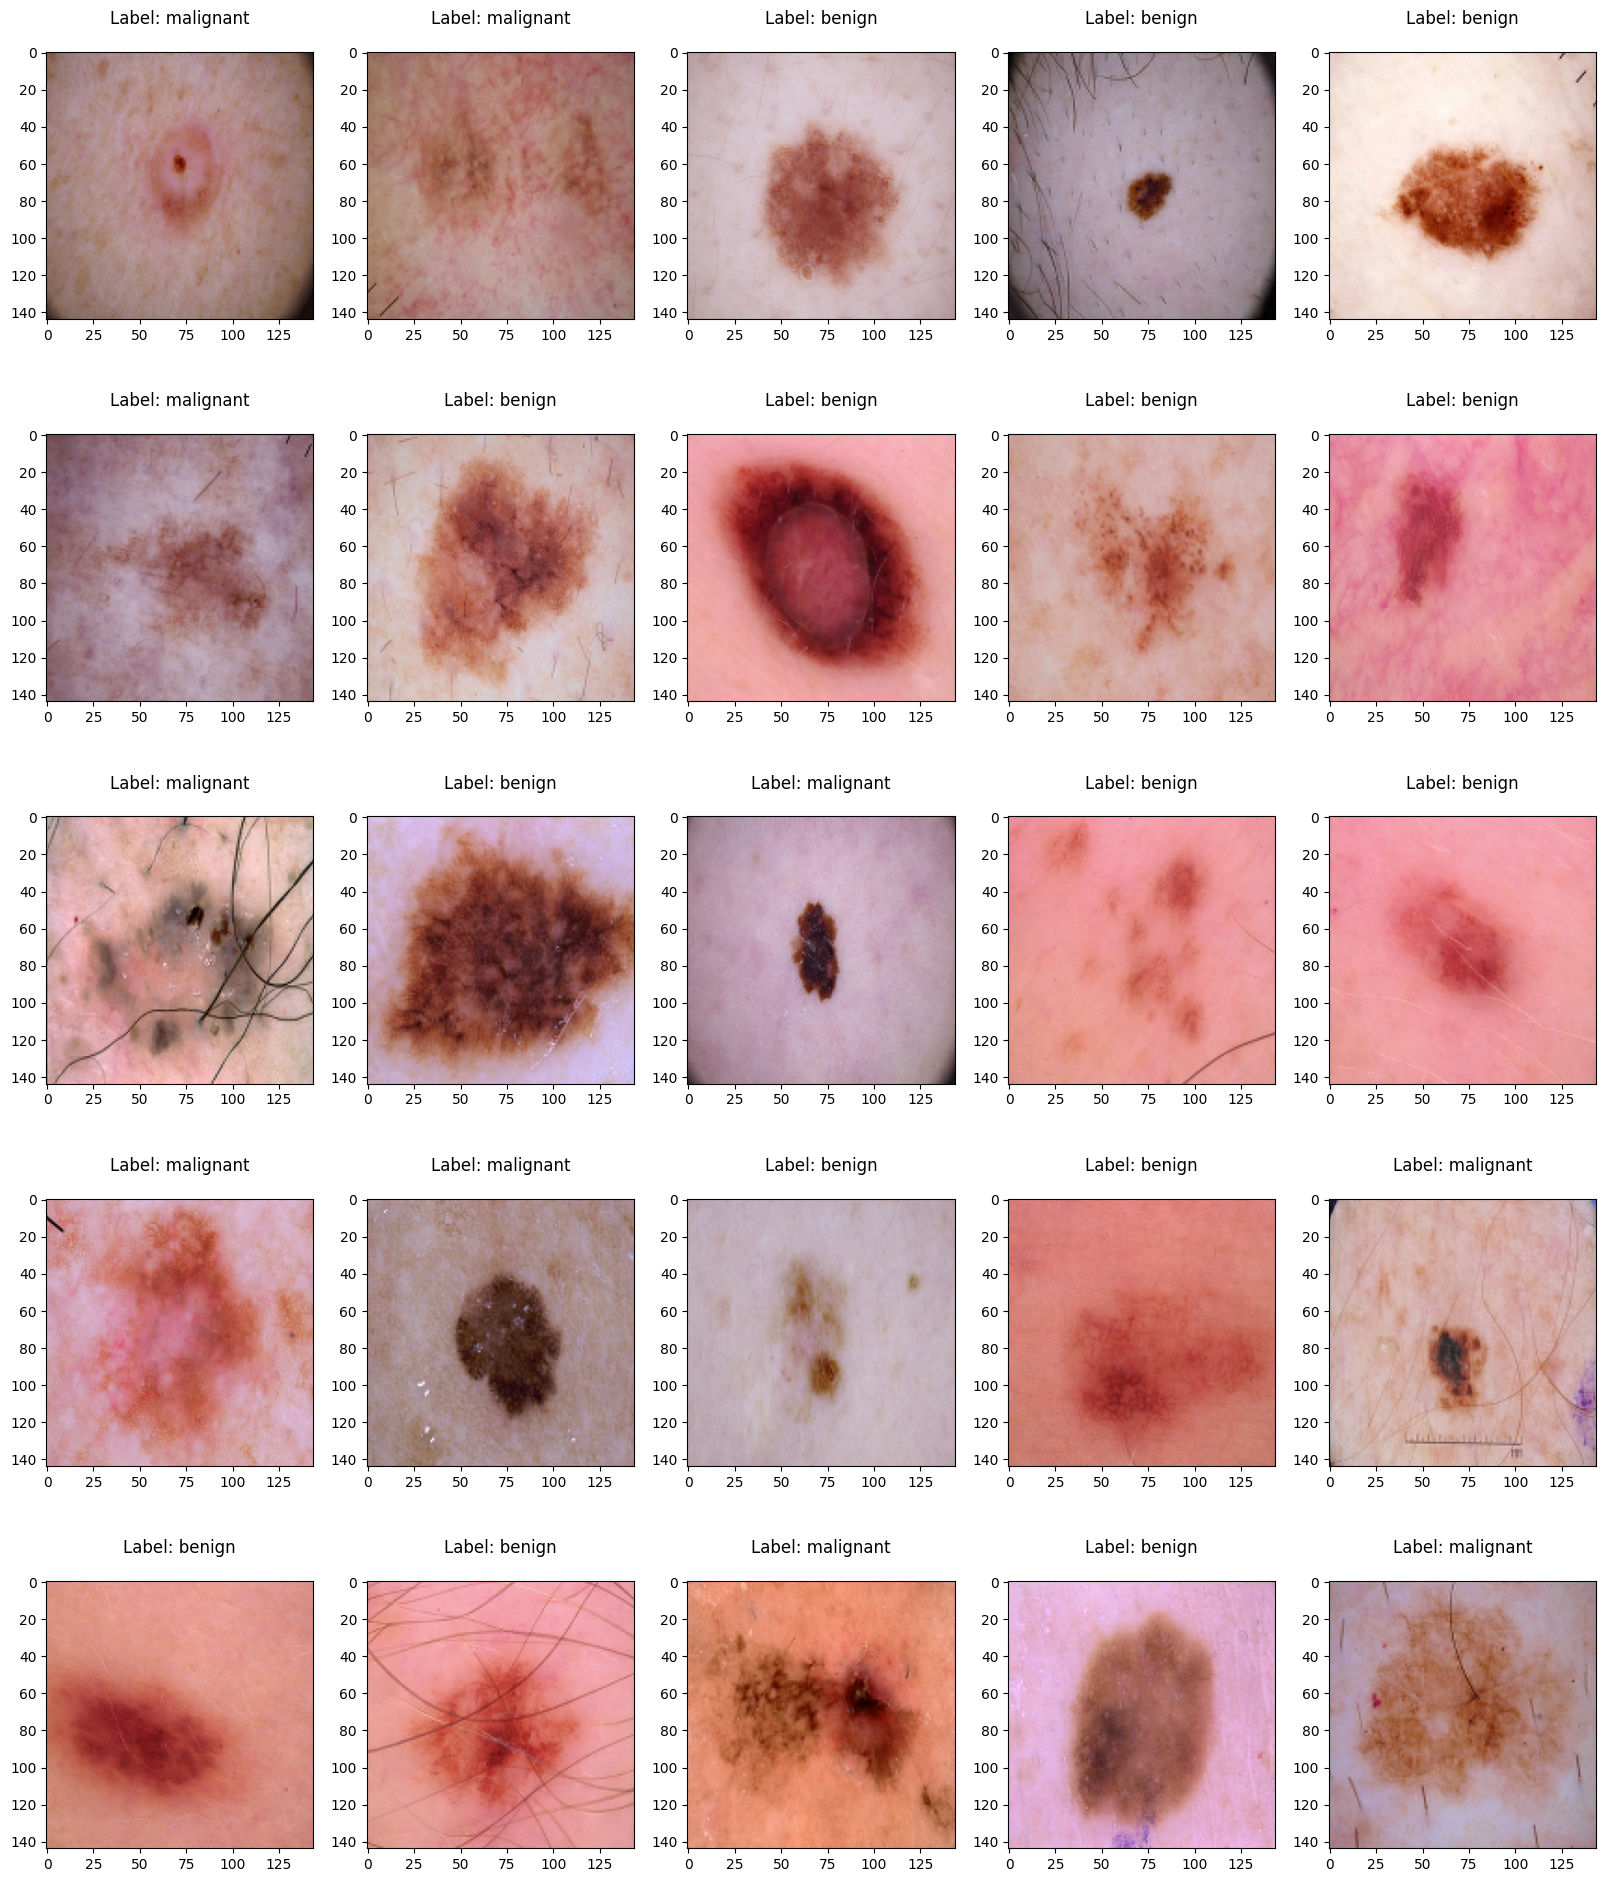

In [25]:
def view_mulitiple_samples(df, sample_loader, count=10, color_map='rgb', fig_size=(14, 10)):
    rows = count//5
    if count%5 > 0:
        rows +=1
    
    idx = random.sample(df.index.to_list(), count)    
    fig = plt.figure(figsize=fig_size)

    for column, _ in enumerate(idx):
        plt.subplot(rows, 5, column+1)
        plt.title(f'Label: {df.label[_]}', pad=20)
        
        if color_map=='rgb':
            plt.imshow(sample_loader(df.image_path[_]))
        else:
            plt.imshow(tf.image.rgb_to_grayscale(sample_loader(df.image_path[_])), cmap=color_map)
    
    return

view_mulitiple_samples(train_df, _load, 
                       count=25, 
                       fig_size=(20, 24))

## **Visualização das imagens com filtro RGB**

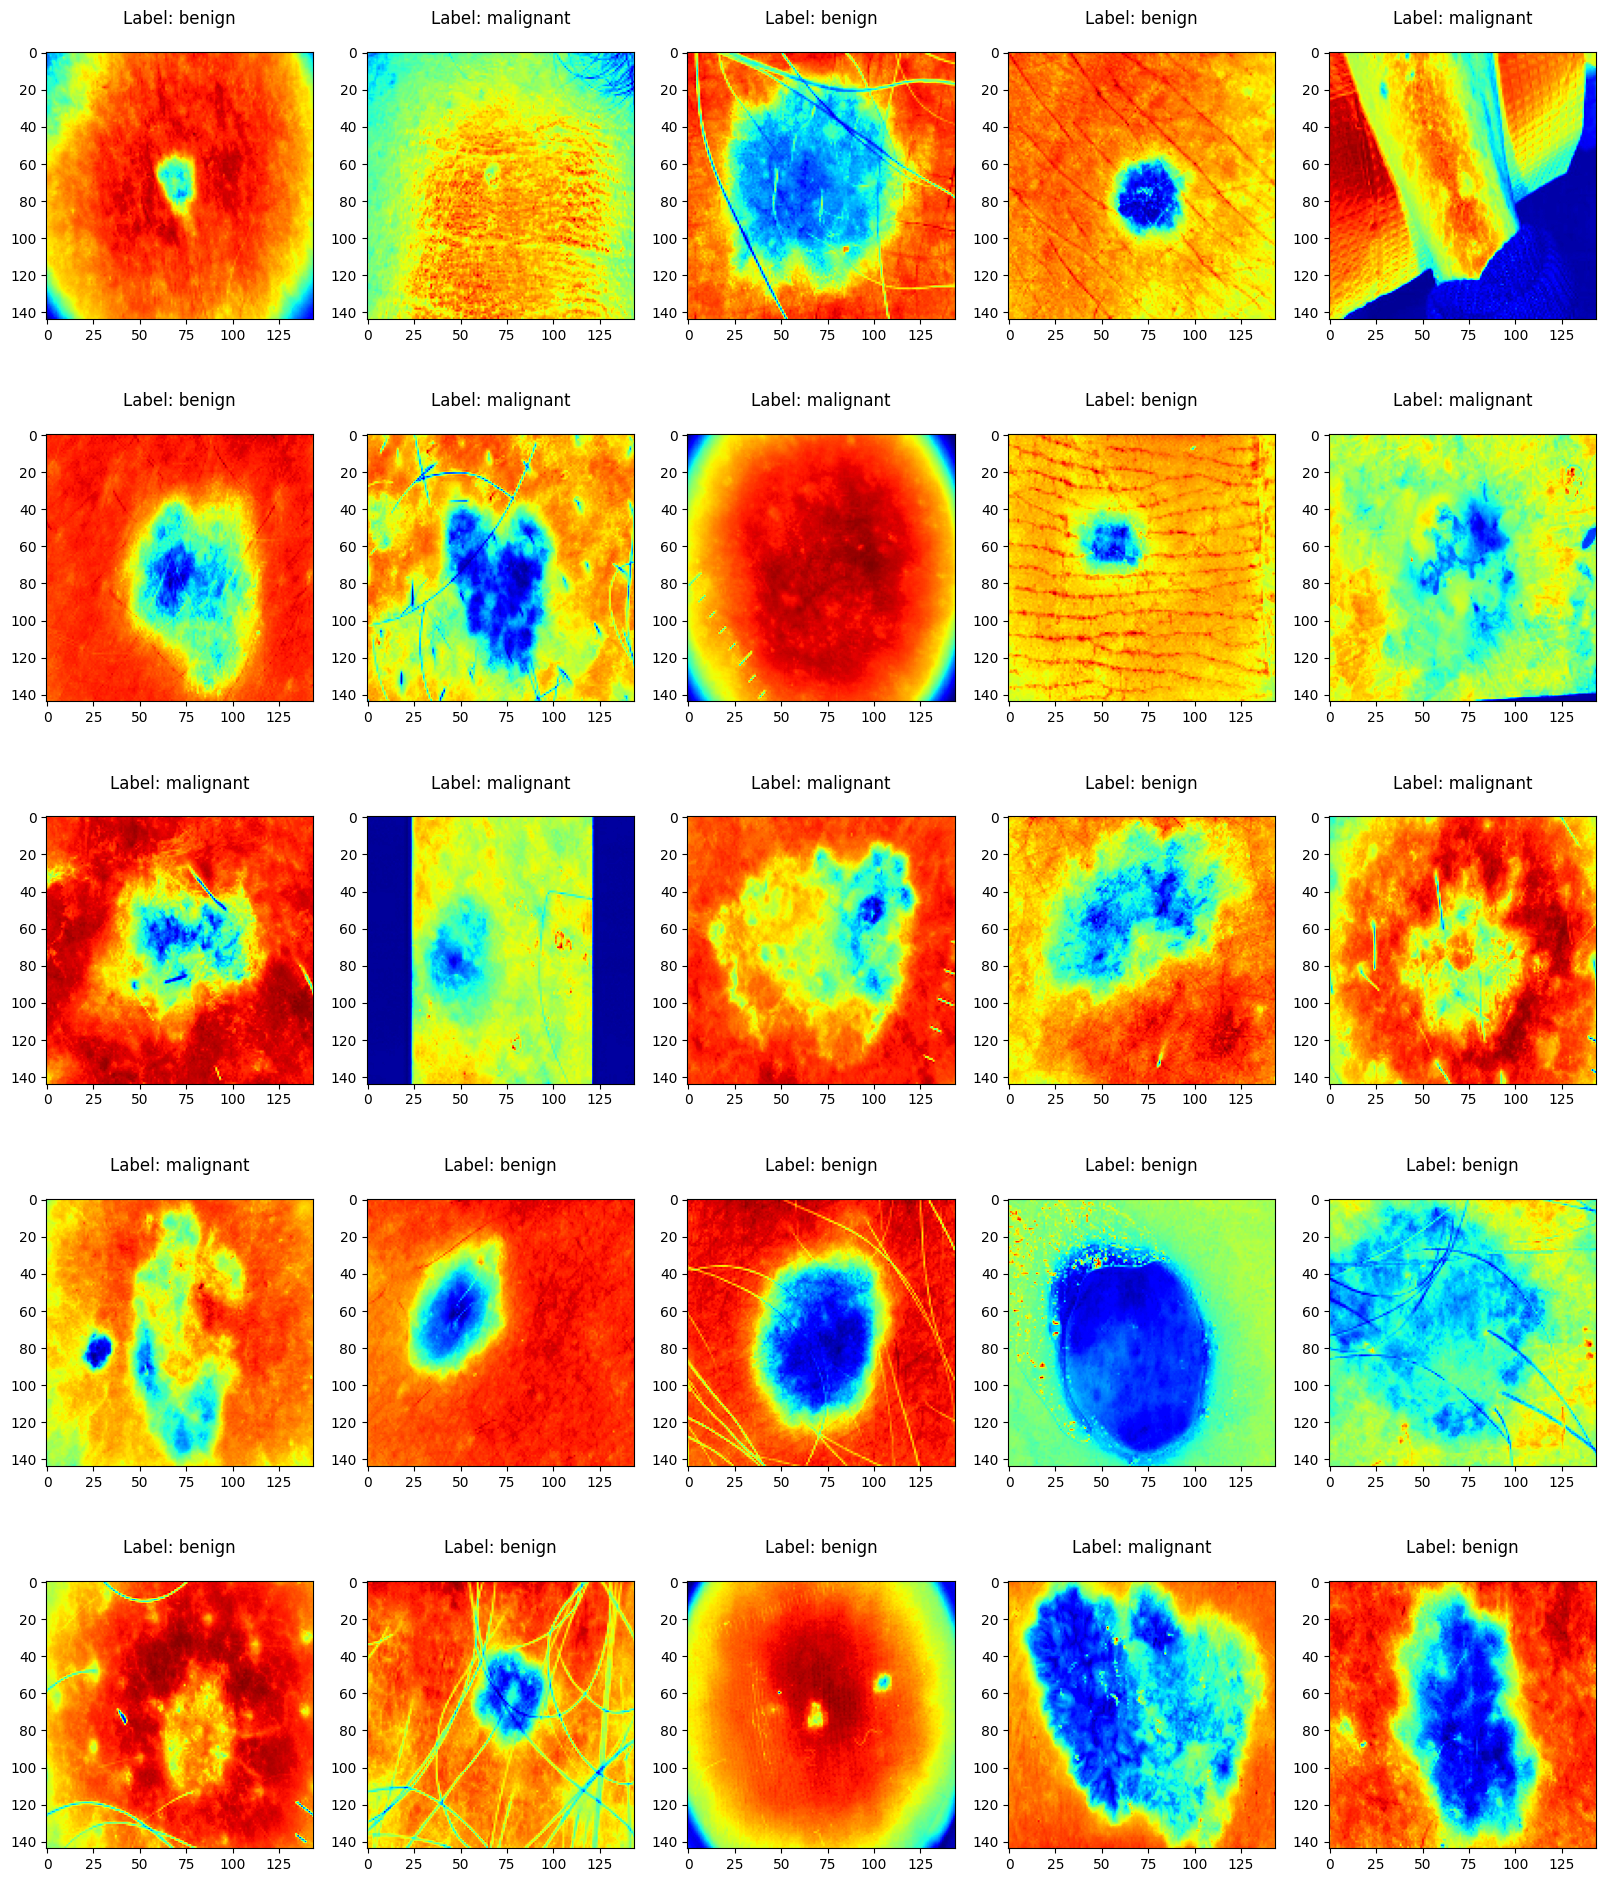

In [26]:
def view_mulitiple_samples(df, sample_loader, count=10, color_map='rgb', fig_size=(14, 10)):
    rows = count//5
    if count%5 > 0:
        rows +=1
    
    idx = random.sample(df.index.to_list(), count)    
    fig = plt.figure(figsize=fig_size)

    for column, _ in enumerate(idx):
        plt.subplot(rows, 5, column+1)
        plt.title(f'Label: {df.label[_]}', pad=20)
        
        if color_map=='rgb':
            plt.imshow(sample_loader(df.image_path[_]))
        else:
            plt.imshow(tf.image.rgb_to_grayscale(sample_loader(df.image_path[_])), cmap=color_map)
    
    return

view_mulitiple_samples(train_df, _load, 
                       count=25, color_map='jet', 
                       fig_size=(20, 24))

## **Exemplo Isolado de Treinamento**

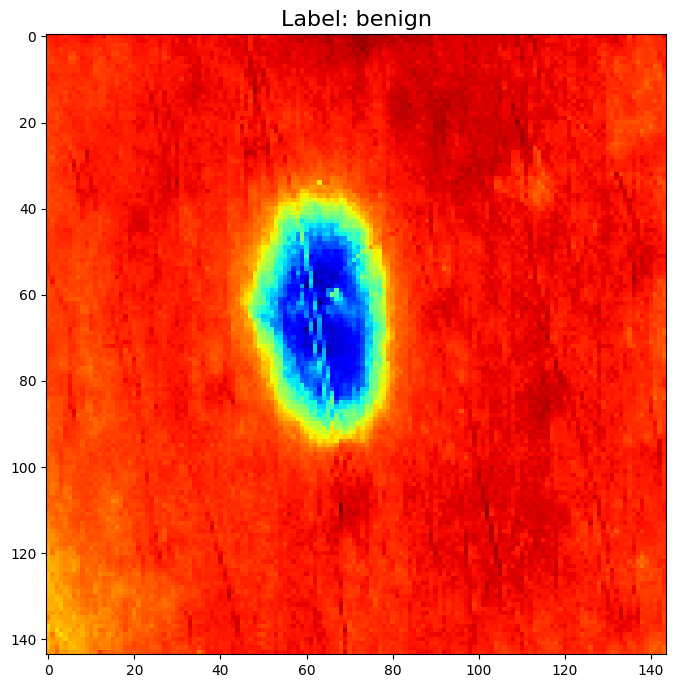

In [27]:
# Selecione uma amostra aleatória de train_df
idx = random.sample(train_df.index.to_list(), 1)[0]


sample_image, sample_label = _load(train_df.image_path[idx]), train_df.label[idx]

view_sample(sample_image, sample_label, color_map='jet')

## **Destribuição do treinamento do modelo**

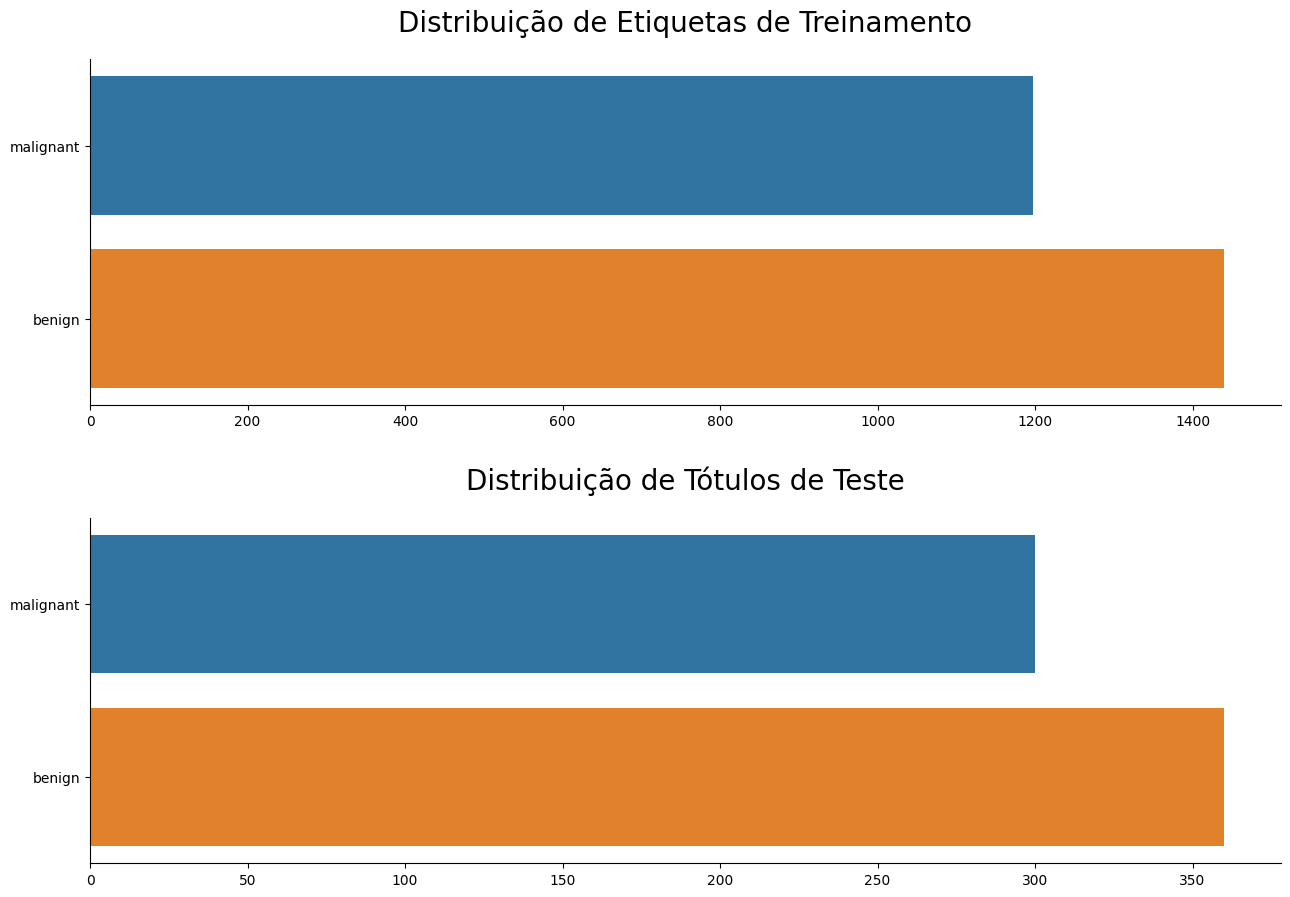

In [28]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Plot Train Labels Distribution
ax1.set_title('Distribuição de Etiquetas de Treinamento', fontsize=20, pad=20)
train_distribution = train_df['label'].value_counts().sort_values()
sns.barplot(x=train_distribution.values,
            y=list(train_distribution.keys()),
            orient="h",
            ax=ax1)

# Plot Test Labels Distribution
ax2.set_title('Distribuição de Tótulos de Teste', fontsize=20, pad=20)
test_distribution = test_df['label'].value_counts().sort_values()
sns.barplot(x=test_distribution.values,
            y=list(test_distribution.keys()),
            orient="h",
            ax=ax2);

sns.despine();

Este trecho de código cria um gráfico de barras para visualizar a distribuição das etiquetas nos conjuntos de treinamento e teste.

`train_distribution = train_df['label'].value_counts().sort_values()` e `test_distribution = test_df['label'].value_counts().sort_values()`:
   - Calculam a contagem de cada etiqueta nos conjuntos de treinamento e teste, respectivamente. O resultado é ordenado.

Esses gráficos de barras fornecem uma representação visual da distribuição das etiquetas nos conjuntos de treinamento e teste.

# **Pré-processamento dos Dados**

In [29]:
# Create Train/Val split with Training Set
train_split_idx, val_split_idx, _, _ = train_test_split(train_df.index, 
                                                        train_df.label_encoded, 
                                                        test_size=0.15,
                                                        stratify=train_df.label_encoded,
                                                        random_state=CFG.SEED)

Este trecho de código cria um conjunto de treinamento e validação a partir do conjunto de treinamento original. 

- `train_test_split(train_df.index, train_df.label_encoded, test_size=0.15, stratify=train_df.label_encoded, random_state=CFG.SEED)`:
  - Esta função divide os dados em conjuntos de treinamento e validação.

  - `train_df.index` são os índices das linhas no DataFrame de treinamento.
  
  - `train_df.label_encoded` são os rótulos codificados no DataFrame de treinamento.

  - `test_size=0.15` indica que 15% dos dados serão alocados para o conjunto de validação.

  - `stratify=train_df.label_encoded` garante que a distribuição das classes no conjunto de treinamento e validação seja semelhante. Isso é importante para evitar desequilíbrios entre as classes nos conjuntos.

  - `random_state=CFG.SEED` é a semente usada para a aleatoriedade da divisão. Isso garante que a divisão seja reproduzível.

- `train_split_idx, val_split_idx, _, _ = ...`:
  - Os índices resultantes da divisão são atribuídos às variáveis `train_split_idx` e `val_split_idx`.

Essa divisão é importante para criar um conjunto de validação que pode ser usado para avaliar o desempenho do modelo durante o treinamento. O conjunto de treinamento é usado para ajustar os pesos do modelo, enquanto o conjunto de validação é usado para monitorar a performance e evitar overfitting.

In [30]:
# Obter novos dados de treinamento e validação
train_new_df = train_df.iloc[train_split_idx].reset_index(drop=True)
val_df = train_df.iloc[val_split_idx].reset_index(drop=True)

train_new_df.shape, val_df.shape

((2241, 3), (396, 3))

## **Visualizão da distribuição dos novos rótulos de treinamento e validação**

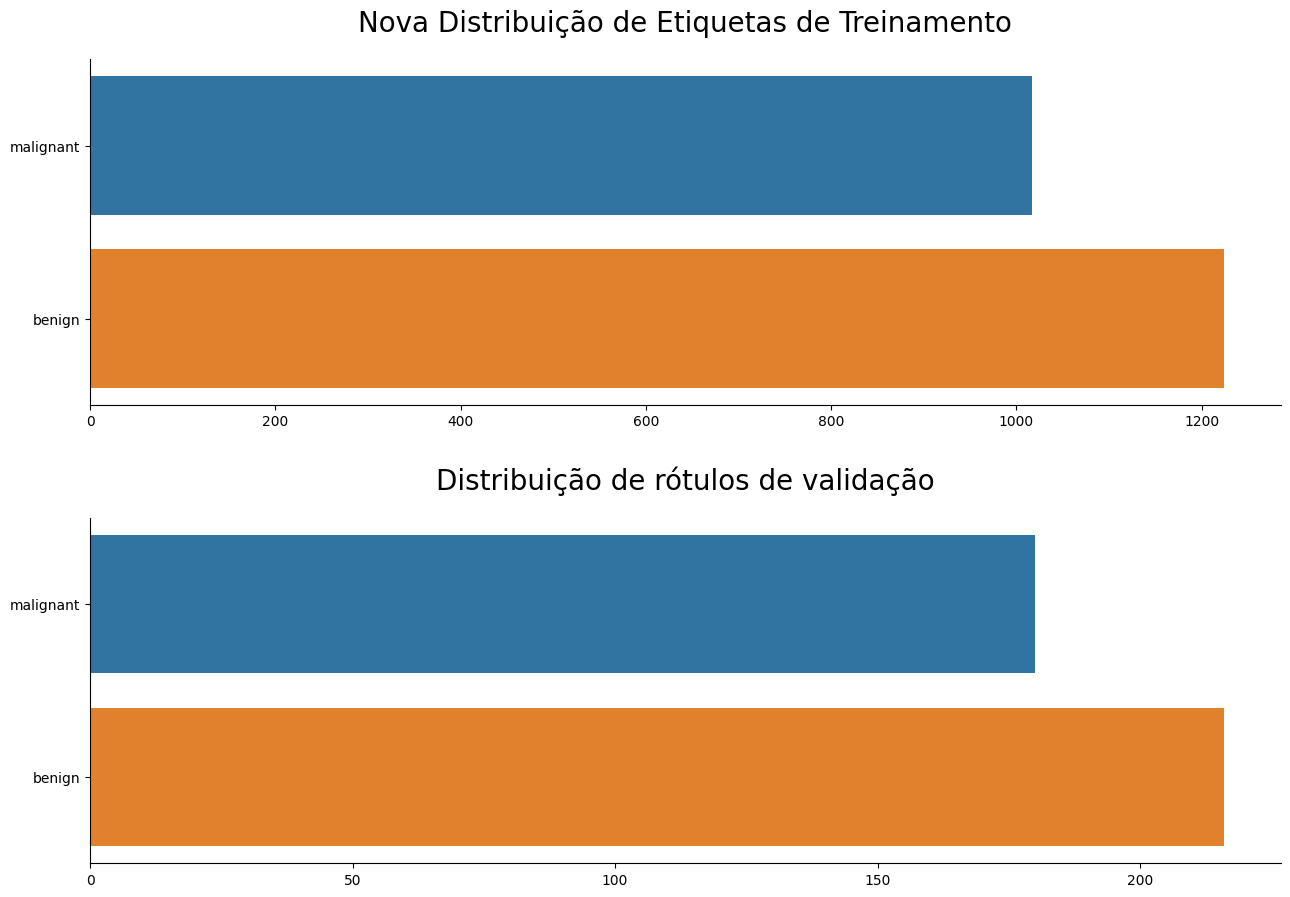

In [31]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Plot New Train Labels Distribution
ax1.set_title('Nova Distribuição de Etiquetas de Treinamento', fontsize=20, pad=20)
train_new_distribution = train_new_df['label'].value_counts().sort_values()
sns.barplot(x=train_new_distribution.values,
            y=list(train_new_distribution.keys()),
            orient="h",
            ax=ax1)

# Plot Validation Labels Distribution
ax2.set_title('Distribuição de rótulos de validação', fontsize=20, pad=20)
val_distribution = val_df['label'].value_counts().sort_values()
sns.barplot(x=val_distribution.values,
            y=list(val_distribution.keys()),
            orient="h",
            ax=ax2);

sns.despine();

# Data Augmentation

In [32]:
# Construir camada de aumento
augmentation_layer = Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical', seed=CFG.TF_SEED),
    layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), seed=CFG.TF_SEED),
], name='augmentation_layer')


- `Sequential([...], name='augmentation_layer')`:
   - Define uma sequência de camadas que serão aplicadas em série.
   - A camada será chamada de `augmentation_layer`.

- `layers.RandomFlip(mode='horizontal_and_vertical', seed=CFG.TF_SEED)`:
   - Esta camada aplica uma operação de espelhamento aleatório, tanto horizontal quanto verticalmente.
   - `mode='horizontal_and_vertical'` indica que o espelhamento pode ocorrer tanto na horizontal quanto na vertical.
   - `seed=CFG.TF_SEED` define a semente para a aleatoriedade, garantindo que a operação seja reproduzível.

- `layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), seed=CFG.TF_SEED)`:
   - Esta camada aplica um fator de zoom aleatório à imagem.
   - `height_factor=(-0.1, 0.1)` e `width_factor=(-0.1, 0.1)` definem os intervalos para os fatores de zoom na altura e largura, respectivamente. No intervalo de -0.1 a 0.1, isso significa que a imagem pode ser aumentada em até 10% ou reduzida em até 10%.
   - `seed=CFG.TF_SEED` define a semente para a aleatoriedade, garantindo que a operação seja reproduzível.

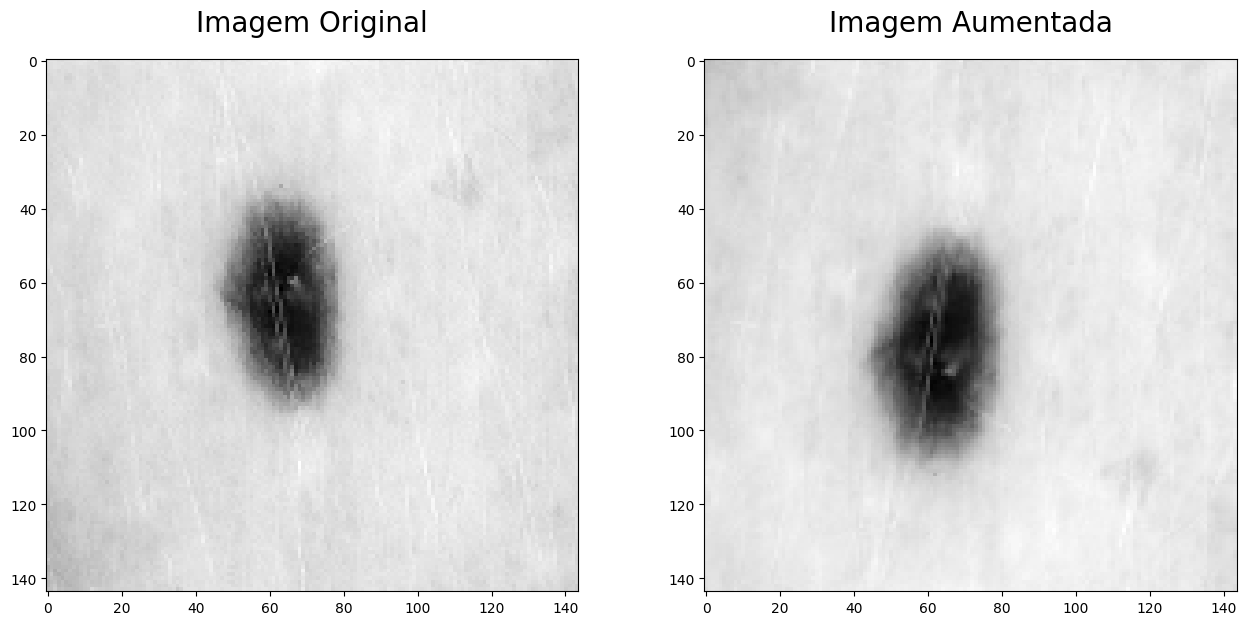

In [33]:
image = tf.image.rgb_to_grayscale(sample_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10))

# Set the spacing between subplots
fig.tight_layout(pad=6.0)

# Mostra a imagem original
ax1.set_title('Imagem Original', fontsize=20, pad=20)
ax1.imshow(image, cmap='gray');

# Mostra a imagem aumentada
ax2.set_title('Imagem Aumentada', fontsize=20, pad=20)
ax2.imshow(augmentation_layer(image), cmap='gray');

## **Criação das pipelines de dados de entrada**

In [34]:
def encode_labels(labels, encode_depth=2):
    return tf.one_hot(labels, depth=encode_depth).numpy()

def create_pipeline(df, load_function, augment=False, batch_size=32, shuffle=False, cache=None, prefetch=False):
    
    # Obten caminhos e rótulos de imagens do DataFrame
    image_paths = df.image_path
    image_labels = encode_labels(df.label_encoded)
    AUTOTUNE = tf.data.AUTOTUNE
    
    # Cria um conjunto de dados com dados brutos do DataFrame
    ds = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
    
    # Mapeia a camada de aumento e a função de carregamento para entradas do conjunto de dados se o aumento for True
    if augment:
        ds = ds.map(lambda x, y: (augmentation_layer(load_function(x)), y), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (load_function(x), y), num_parallel_calls=AUTOTUNE)
    
    # Aplica embaralhamento com base na condição
    if shuffle:
        ds = ds.shuffle(buffer_size=1000)
        

    ds = ds.batch(batch_size)
    
    # Aplicar cache com base na condição
    if cache != None:
        ds = ds.cache(cache)
    
    # Aplica a pré-busca com base na condição
    if prefetch:
        ds = ds.prefetch(buffer_size=AUTOTUNE)
    
    return ds

Foi definida uma função chamada `create_pipeline` que constrói um pipeline de dados para o treinamento do modelo, ela possui:

`def encode_labels(labels, encode_depth=2)`: 
   - Esta função codifica os rótulos em one-hot encoding. O parâmetro `encode_depth` indica o número de classes no problema de classificação. O valor padrão é 2, indicando que há duas classes.

`image_paths = df.image_path` e `image_labels = encode_labels(df.label_encoded)`:
   - Extrai os caminhos das imagens e os rótulos do DataFrame.

`ds = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))`:
   - Cria um conjunto de dados a partir dos caminhos das imagens e seus rótulos.

`ds = ds.map(...)`:
   - Mapeia a função especificada para as entradas do conjunto de dados. Dependendo do valor de `augment`, ele pode aplicar a camada de aumento ou a função de carregamento diretamente.

`if shuffle: ds = ds.shuffle(buffer_size=1000)`:
   - Se `shuffle` for `True`, aplica o embaralhamento no conjunto de dados.

In [35]:
# Gera a pipeline de entrada de treino
train_ds = create_pipeline(train_new_df, _load, augment=True, 
                           batch_size=CFG.BATCH_SIZE, 
                           shuffle=False, prefetch=True)

# Gera a pipeline de entrada de validação
val_ds = create_pipeline(val_df, _load, 
                         batch_size=CFG.BATCH_SIZE, 
                         shuffle=False, prefetch=False)

# Gera a pipeline de entrada de teste
test_ds = create_pipeline(test_df, _load, 
                          batch_size=CFG.BATCH_SIZE, 
                          shuffle=False, prefetch=False)

In [36]:
print('========================================')
print('Train Input Data Pipeline:\n\n', train_ds)
print('========================================')
print('Validation Input Data Pipeline:\n\n', val_ds)
print('========================================')
print('Test Input Data Pipeline:\n\n', test_ds)
print('========================================')

Train Input Data Pipeline:

 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Validation Input Data Pipeline:

 <_BatchDataset element_spec=(TensorSpec(shape=(None, 144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Test Input Data Pipeline:

 <_BatchDataset element_spec=(TensorSpec(shape=(None, 144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


Nesta saída, se observa que:

- **Train Input Data Pipeline**:
  - O pipeline de dados de treinamento consiste em um conjunto de tuplas, onde o primeiro elemento é um tensor de imagens com forma `(None, 144, 144, 3)` e o segundo elemento é um tensor de rótulos codificados com forma `(None, 2)`. 
  - O `None` indica que o tamanho do lote pode variar.

- **Validation Input Data Pipeline**:
  - O pipeline de dados de validação possui a mesma estrutura que o de treinamento.

- **Test Input Data Pipeline**:
  - O pipeline de dados de teste também possui a mesma estrutura que o de treinamento.


# **Aplicando Transformadores Convolucionais Compactos**

In [37]:
class CCTTokenizer(layers.Layer):
    def __init__(
        self,
        kernel_size=3,
        stride=1,
        padding=1,
        pooling_kernel_size=3,
        pooling_stride=3,
        num_conv_layers=3,
        num_output_channels=[64, 128],
        positional_embedding=True,
        **kwargs,
    ):
        # Inicializa o tokenizador
        super(CCTTokenizer, self).__init__(**kwargs)
        self.tokenizer = Sequential()
        
        for _ in range(num_conv_layers):
            self.tokenizer.add(
                layers.Conv2D(
                    num_output_channels[_],
                    kernel_size, stride,
                    padding="valid", use_bias=False, 
                    activation="relu",kernel_initializer="he_normal",
                    name=f'tokenizer_conv_{_}'
                )
            )
            # Adiciona a camada de preenchimento
            self.tokenizer.add(
                layers.ZeroPadding2D(padding, name=f'tokenizer_padding_{_}')
            )
            
            # Adiciona a camada MaxPool
            self.tokenizer.add(
                layers.MaxPool2D(
                    pooling_kernel_size, 
                    pooling_stride, "same", 
                    name=f'tokenizer_maxpool_2d_{_}'
                )
            )

        self.positional_embedding = positional_embedding

    def __call__(self, images):
        tokenized_image = self.tokenizer(images)
        
    
        img_seq = tf.reshape(
            tokenized_image,
            (-1, tf.shape(tokenized_image)[1] * tf.shape(tokenized_image)[2], tf.shape(tokenized_image)[-1]),
        )
        
        return img_seq

    def gen_positional_embedding(self, image_size):
        if self.positional_embedding:
            dummy_inputs = tf.ones((1, image_size, image_size, 3)) # dummy input
            
            dummy_outputs = self.__call__(dummy_inputs)
            
            sequence_length = dummy_outputs.shape[1]
            projection_dim = dummy_outputs.shape[-1]

            embedding_layer = layers.Embedding(
                input_dim=sequence_length, output_dim=projection_dim, name='tokenizer_pos_embedding'
            )
            
            return embedding_layer, sequence_length
        else:
            return None # Incorporação posicional desativada

Aqui temos a definição de uma camada personalizada chamada `CCTTokenizer`. Esta camada tem a função de processar as imagens de entrada, realizando uma série de operações de convolução e pooling para extrair características relevantes.

- `def __init__(...)`:
  - Este é o inicializador da classe `CCTTokenizer`. Aqui estão os parâmetros que a camada aceita:

    - `kernel_size`, `stride`, `padding`: Parâmetros para as camadas de convolução.
    - `pooling_kernel_size`, `pooling_stride`: Parâmetros para as camadas de pooling.
    - `num_conv_layers`: Número de camadas de convolução.
    - `num_output_channels`: Lista com o número de canais de saída para cada camada de convolução.
    - `positional_embedding`: Indica se a camada deve gerar embeddings posicionais.

  - A camada é inicializada como uma sequência vazia (`self.tokenizer = Sequential()`). Em seguida, ela itera sobre o número de camadas de convolução especificadas (`for _ in range(num_conv_layers)`) e adiciona as camadas de convolução, padding e max pooling à sequência.

- `def __call__(self, images)`:
  - Esta função é chamada quando a camada é utilizada em um modelo. Ela recebe as imagens de entrada e aplica as operações de convolução e pooling definidas anteriormente.

- `def gen_positional_embedding(self, image_size)`:
  - Esta função gera a camada de embeddings posicionais, se ativada. Ela cria uma camada de embeddings baseada no tamanho das sequências produzidas pela camada de convolução.

Esta camada personalizada encapsula todo o processo de tokenização de imagens usando convoluções e pooling. Ela também tem a opção de gerar embeddings posicionais, se necessário. 

## **Profundidade Estocástica**

In [38]:
class StochasticDepth(layers.Layer):
    def __init__(self, droupout_rate, **kwargs):
        super().__init__(**kwargs)
        self.droupout_rate = droupout_rate

    def __call__(self, x, training=None):
        if training:
            # Define a taxa de sobrevivência
            survival_rate = 1 - self.droupout_rate
            
            # Define a forma de saída
            shape = (x.shape[0],) + (1,) * (x.shape[0] - 1)
            
            # Gera as desistências aleatórias
            random_tensor = survival_rate + tf.random.uniform(shape, 0, 1)
            random_tensor = tf.floor(random_tensor)
            
            return (x / survival_rate) * random_tensor
        
        return x

Aqui temos a definição de uma camada personalizada chamada `StochasticDepth`. Esta camada implementa a técnica de "Stochastic Depth" que é utilizada para melhorar o desempenho de redes neurais profundas.

- `def __init__(self, dropout_rate, **kwargs)`:
  - Este é o inicializador da classe `StochasticDepth`. Aqui está o parâmetro que a camada aceita:

    - `dropout_rate`: Taxa de dropout que controla a probabilidade de uma unidade ser desativada durante o treinamento.

- `def __call__(self, x, training=None)`:
  - Esta função é chamada quando a camada é utilizada em um modelo. Ela recebe um tensor `x` como entrada e um argumento opcional `training` que indica se o modelo está em modo de treinamento ou inferência.

  - Dentro da função, ela verifica se o modelo está em modo de treinamento (`if training:`). Se estiver, ele aplica a técnica de "Stochastic Depth":

    - Calcula a taxa de sobrevivência (`survival_rate`) como `1 - dropout_rate`.
    - Define a forma do tensor de desistência aleatória (`random_tensor`) para ter o mesmo formato que `x`, mas com uns em dimensões adicionais.
    - Gera valores aleatórios entre `0` e `1` e os arredonda para obter tensores binários de desistência.
    - Multiplica `x` pelo inverso da taxa de sobrevivência e pela desistência aleatória.

  - Se o modelo não estiver em modo de treinamento, a função simplesmente retorna `x` sem aplicar a técnica de Stochastic Depth.


## **Multi-Layer Perceptron (MLP)**

In [39]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

Esta função `mlp` implementa uma rede neural feedforward (também conhecida como Perceptron Multicamadas ou MLP) com camadas totalmente conectadas e camadas de dropout entre elas.

- `def mlp(x, hidden_units, dropout_rate)`:
  - Esta função aceita três argumentos:
    - `x`: A entrada para a rede neural.
    - `hidden_units`: Uma lista de unidades para cada camada oculta.
    - `dropout_rate`: A taxa de dropout que será aplicada após cada camada.

- `for units in hidden_units:`:
  - Esta linha inicia um loop sobre as unidades especificadas na lista `hidden_units`. Isso indica quantas camadas ocultas a rede terá e quantas unidades cada uma dessas camadas terá.

- `x = layers.Dense(units, activation=tf.nn.gelu)(x)`:
  - Para cada unidade no loop, cria uma camada densa (totalmente conectada) com `units` neurônios e ativação gelu (uma função de ativação não linear).
  - A camada densa recebe `x` como entrada.

- `x = layers.Dropout(dropout_rate)(x)`:
  - Após cada camada densa, aplica uma camada de dropout com a taxa especificada.

- `return x`:
  - Retorna a saída final após passar por todas as camadas densas e de dropout.

Essa função constrói uma arquitetura de rede neural feedforward com várias camadas ocultas, onde cada camada tem um número diferente de unidades.

## **Aplicando o CCT**

In [40]:
def create_cct_model(
    image_size=CFG.IMAGE_SIZE,
    input_shape=CFG.IMAGE_SHAPE,
    num_heads=CFG.NUM_HEADS,
    projection_dim=CFG.PROJECTION_DIM,
    transformer_units=CFG.TRANSFORMER_UNITS,
    transformer_layers=CFG.TRANSFORMER_LAYERS,
    possitional_embedding=CFG.POSITIONAL_EMBEDDING,
    stochastic_depth_rate = CFG.STOCHASTIC_DEPTH_RATE
):
    # Define a Camada de entrada
    inputs = layers.Input(input_shape, dtype=tf.float32, name='input_image')

    # Aumenta a imeagem de entrada
    augmented = augmentation_layer(inputs)

    # Tokeniza os patches de imagem
    cct_tokenizer = CCTTokenizer()
    encoded_patches = cct_tokenizer(augmented)

    if possitional_embedding:
        pos_embedding_layer, seq_length = cct_tokenizer.gen_positional_embedding(image_size)
        positions = tf.range(start=0, limit=seq_length, delta=1)
        
        pos_embeddings = pos_embedding_layer(positions)        
        encoded_patches += pos_embeddings

    # Calcula probabilidades de profundidade estocástica
    dpr = [_ for _ in np.linspace(0, stochastic_depth_rate, transformer_layers)]

    # Gera as camadas para o bloco Transformer
    for _ in range(transformer_layers):
        norm_layer_1 = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)

        # Gera a camada de autoatenção de múltiplas cabeças
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(norm_layer_1, norm_layer_1)

        attention_output = StochasticDepth(dpr[_])(attention_output)
        residual_1 = layers.Add()([
            attention_output, encoded_patches
        ])

        norm_layer_2 = layers.LayerNormalization(epsilon=1e-5)(residual_1)

        mlp_layer = mlp(
            norm_layer_2, hidden_units=transformer_units, dropout_rate=0.1
        )

        stochastic_depth_1 = StochasticDepth(dpr[_])(mlp_layer)
        encoded_patches = layers.Add()([stochastic_depth_1, residual_1])

    seq_representation = layers.LayerNormalization(epsilon=1e-5)(encoded_patches)
    
    attention_weights = tf.nn.softmax(layers.Dense(1)(seq_representation), axis=1)
    
    weighted_seq_representation = tf.matmul(
        attention_weights, 
        seq_representation, 
        transpose_a=True
    )
    weighted_seq_representation = tf.squeeze(weighted_seq_representation, -2)

    output_layer = layers.Dense(
        CFG.NUM_CLASSES, 
        activation=tf.nn.sigmoid,
        name='output_layer'
    )(weighted_seq_representation)
    
    model = tf.keras.Model(
        inputs=[inputs], outputs=[output_layer], 
        name='compact_convolutional_transformer_model'
    )
    
    return model

A função `create_cct_model` gera um modelo de rede neural com arquitetura baseada no Compact Convolutional Transformer (CCT):

1. `inputs = layers.Input(input_shape, dtype=tf.float32, name='input_image')`:
   - Define a camada de entrada para o modelo. `input_shape` e `dtype` são definidos pelos valores fornecidos ou pelos valores padrão.

2. `augmented = augmentation_layer(inputs)`:
   - Aplica a camada de aumento de dados às imagens de entrada.

3. `cct_tokenizer = CCTTokenizer()`:
   - Cria uma instância da classe `CCTTokenizer` que foi definida anteriormente.

4. `encoded_patches = cct_tokenizer(augmented)`:
   - Passa as imagens aumentadas pelo tokenizador CCT para converter as imagens em sequências de "patches" (pequenas partes da imagem).

5. Condição para adicionar embeddings posicionais:
   - Se `positional_embedding` estiver ativado (`if positional_embedding:`), a camada de embedding posicional é criada e adicionada aos "patches" codificados.

6. Cálculo das probabilidades de Stochastic Depth:
   - `dpr = [_ for _ in np.linspace(0, stochastic_depth_rate, transformer_layers)]` gera uma lista de taxas de desativação estocástica.

7. Loop sobre as camadas do Transformer:
   - Dentro do loop, várias operações são realizadas, incluindo normalizações, atenção multi-cabeça, conexões de desvio e camadas MLP.

8. Aplicação de pooling de sequência:
   - `seq_representation` é normalizada e usado para calcular os pesos de atenção. Esses pesos são utilizados para calcular uma representação ponderada da sequência.

9. Camada de saída:
   - A representação ponderada da sequência é alimentada em uma camada densa de saída com ativação sigmoide.

10. Geração do modelo:
    - O modelo é construído com as camadas de entrada e saída e retorna o modelo completo.

Essa função cria um modelo de rede neural com a arquitetura baseada no Compact Convolutional Transformer, incluindo todas as camadas e operações necessárias.

In [41]:
tf.random.set_seed(CFG.TF_SEED)

cct_model = create_cct_model()

cct_model.summary()

Model: "compact_convolutional_transformer_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 144, 144, 3  0           []                               
                                )]                                                                
                                                                                                  
 augmentation_layer (Sequential  (144, 144, None)    0           ['input_image[0][0]']            
 )                                                                                                
                                                                                                  
 sequential (Sequential)        (None, 36, 36, 128)  75456       ['augmentation_layer[0][0]']     
                                                            

# **Treinando os CCT**

In [42]:
# Define o retorno de chamada de parada antecipada
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True)

# Define as Listas de retornos de chamada e métricas
CALLBACKS = [
    early_stopping_callback, 
]

METRICS = ['accuracy']

Neste trecho do código, estão sendo definidos o retorno de chamada de parada antecipada e as listas de retornos de chamada e métricas.

1. **Retorno de Chamada de Parada Antecipada** (`early_stopping_callback`):

   - Este retorno de chamada monitora a métrica de perda (`val_loss`) durante o treinamento. Ele irá interromper o treinamento se a perda na fase de validação não apresentar melhora após um determinado número de épocas (determinado pela paciência - `patience`).

   - `monitor='val_loss'`: Indica que o monitoramento será feito com base na perda na fase de validação.

   - `patience=20`: Define o número de épocas sem melhora que irá esperar antes de parar o treinamento.

   - `restore_best_weights=True`: Restaura os pesos do modelo para a melhor época caso a parada antecipada seja ativada.

2. **Listas de Retornos de Chamada e Métricas**:

   - `CALLBACKS`: Uma lista que contém o retorno de chamada de parada antecipada definido anteriormente (`early_stopping_callback`). Esta lista será passada para a função de treinamento do modelo.

   - `METRICS`: Uma lista de métricas que serão monitoradas durante o treinamento. Neste caso, está sendo utilizada apenas a métrica de acurácia (`'accuracy'`). Essa lista será passada para a função de compilação do modelo.

In [43]:
tf.random.set_seed(CFG.TF_SEED)

cct_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
    optimizer=tfa.optimizers.AdamW(learning_rate=CFG.LEARNING_RATE, weight_decay=CFG.WEIGHT_DECAY),
    metrics=METRICS
)

# Train the model 
print(f'Training {cct_model.name}.')
print(f'Train on {len(train_new_df)} samples, validate on {len(val_df)} samples.')
print('----------------------------------')

cct_model_history = cct_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=CFG.BATCH_SIZE,
    epochs=CFG.EPOCHS,
    callbacks=CALLBACKS,
)

Training compact_convolutional_transformer_model.
Train on 2241 samples, validate on 396 samples.
----------------------------------
Epoch 1/5
18/18 [==============================] - 762s 42s/step - loss: 1.0056 - accuracy: 0.5257 - val_loss: 0.6937 - val_accuracy: 0.5455
Epoch 2/5
18/18 [==============================] - 757s 42s/step - loss: 0.7076 - accuracy: 0.5292 - val_loss: 0.7099 - val_accuracy: 0.4545
Epoch 3/5
18/18 [==============================] - 817s 46s/step - loss: 0.7033 - accuracy: 0.5324 - val_loss: 0.6989 - val_accuracy: 0.4545
Epoch 4/5
18/18 [==============================] - 828s 46s/step - loss: 0.6924 - accuracy: 0.5399 - val_loss: 0.6841 - val_accuracy: 0.6616
Epoch 5/5
18/18 [==============================] - 807s 45s/step - loss: 0.6760 - accuracy: 0.6060 - val_loss: 0.6617 - val_accuracy: 0.7146


In [44]:

cct_evaluation = cct_model.evaluate(test_ds)

6/6 [==============================] - 72s 12s/step - loss: 0.6666 - accuracy: 0.6955


In [45]:
# Geras as probabilidades de modelo e previsões associadas
cct_test_probabilities = cct_model.predict(test_ds, verbose=1)
cct_test_predictions = tf.argmax(cct_test_probabilities, axis=1)

6/6 [==============================] - 93s 12s/step


# **Avaliação de desempenho**

### **Plotar históricos de modelos**

In [55]:
def plot_training_curves(history, ):
    
    loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])

    accuracy = np.array(history.history['accuracy'])
    val_accuracy = np.array(history.history['val_accuracy'])

    epochs = range(len(history.history['loss']))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    ax1.plot(epochs, loss, label='training_loss', marker='o')
    ax1.plot(epochs, val_loss, label='val_loss', marker='o')
    
    ax1.fill_between(epochs, loss, val_loss, where=(loss > val_loss), color='C0', alpha=0.3, interpolate=True)
    ax1.fill_between(epochs, loss, val_loss, where=(loss < val_loss), color='C1', alpha=0.3, interpolate=True)

    ax1.set_title('Perda', fontsize=16)
    ax1.set_xlabel('Epochs', fontsize=12)
    ax1.legend()

    ax2.plot(epochs, accuracy, label='training_accuracy', marker='o')
    ax2.plot(epochs, val_accuracy, label='val_accuracy', marker='o')
    
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy > val_accuracy), color='C0', alpha=0.3, interpolate=True)
    ax2.fill_between(epochs, accuracy, val_accuracy, where=(accuracy < val_accuracy), color='C1', alpha=0.3, interpolate=True)

    ax2.set_title('Precisão', fontsize=16)
    ax2.set_xlabel('Epochs', fontsize=12)
    ax2.legend();
    
    sns.despine();

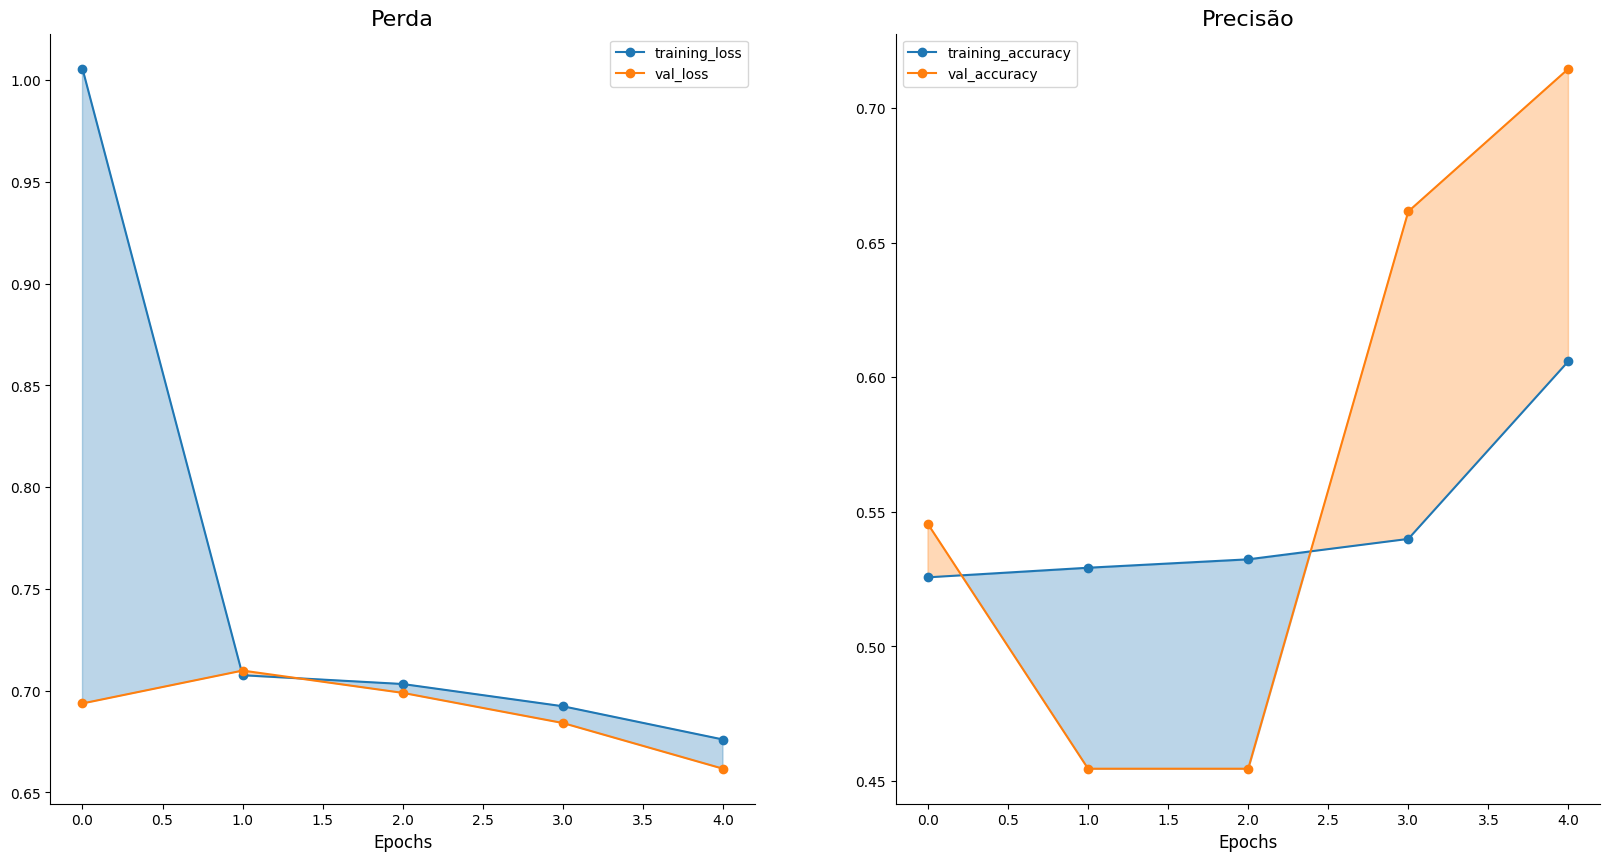

In [56]:
plot_training_curves(cct_model_history)

### **Matriz de confusão**

In [57]:
def plot_confusion_matrix(y_true, y_pred, classes='auto', figsize=(10, 10), text_size=12): 
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=figsize)

    disp = sns.heatmap(
        cm, annot=True, cmap='Greens',
        annot_kws={"size": text_size}, fmt='g',
        linewidths=0.1, linecolor='black', clip_on=False,
        xticklabels=classes, yticklabels=classes)
    
    disp.set_title('Matriz de confusão', fontsize=24)
    disp.set_xlabel('Rótulo previsto', fontsize=20) 
    disp.set_ylabel('Rótulo Verdadeiro', fontsize=20)
    plt.yticks(rotation=0) 

    plt.show()
    
    return

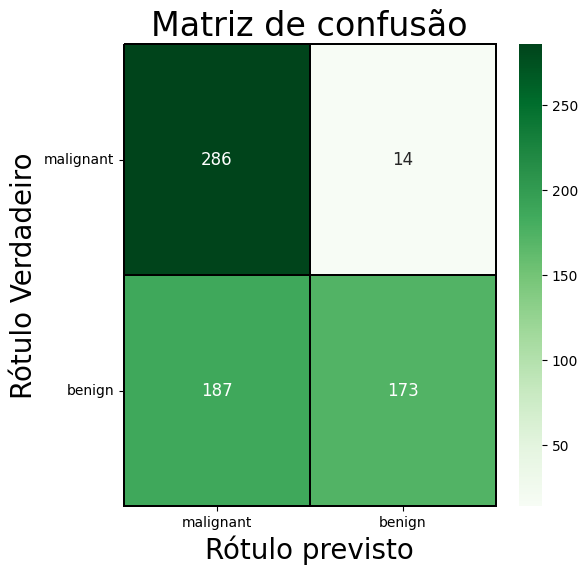

In [58]:
class_names = ['malignant', 'benign']

plot_confusion_matrix(
    test_df.label_encoded, 
    cct_test_predictions, 
    figsize=(6, 6), 
    classes=class_names)

### **Curva ROC**

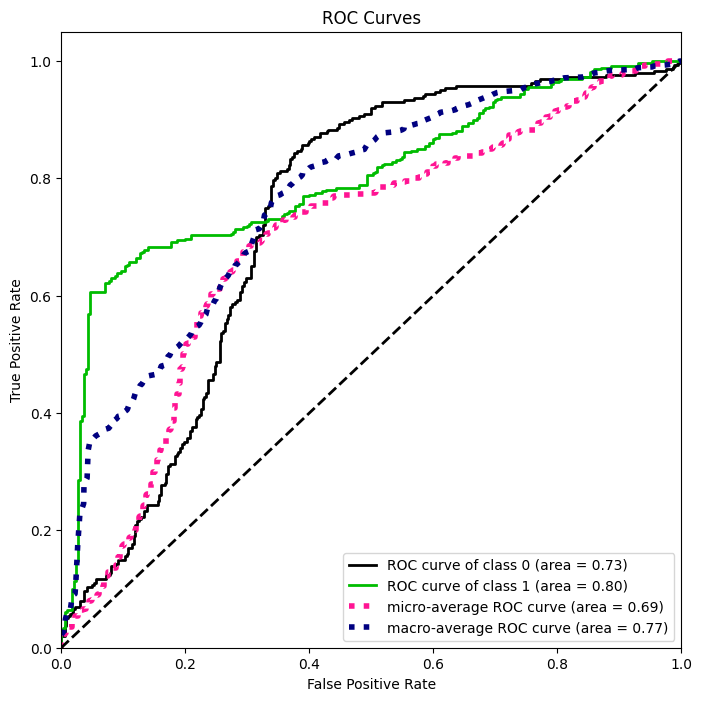

In [50]:
plot_roc(test_df.label_encoded, 
         cct_test_probabilities, 
         figsize=(8, 8), title_fontsize='large');

### **Relatório de Classificação**

In [51]:
print(classification_report(test_df.label_encoded, 
                            cct_test_predictions, 
                            target_names=class_names))

              precision    recall  f1-score   support

   malignant       0.60      0.95      0.74       300
      benign       0.93      0.48      0.63       360

    accuracy                           0.70       660
   macro avg       0.76      0.72      0.69       660
weighted avg       0.78      0.70      0.68       660



### **Métricas de Classificação de Registros**

In [52]:
def generate_preformance_scores(y_true, y_pred, y_probabilities):
    
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, 
                                                                                 y_pred, 
                                                                                 average="weighted")
    model_matthews_corrcoef = matthews_corrcoef(y_true, y_pred)
    
    print('=============================================')
    print(f'\nPerformance Metrics:\n')
    print('=============================================')
    print(f'accuracy_score:\t\t{model_accuracy:.4f}\n')
    print('_____________________________________________')
    print(f'precision_score:\t{model_precision:.4f}\n')
    print('_____________________________________________')
    print(f'recall_score:\t\t{model_recall:.4f}\n')
    print('_____________________________________________')
    print(f'f1_score:\t\t{model_f1:.4f}\n')
    print('_____________________________________________')
    print(f'matthews_corrcoef:\t{model_matthews_corrcoef:.4f}\n')
    print('=============================================')
    
    preformance_scores = {
        'accuracy_score': model_accuracy,
        'precision_score': model_precision,
        'recall_score': model_recall,
        'f1_score': model_f1,
        'matthews_corrcoef': model_matthews_corrcoef
    }
    return preformance_scores

In [53]:
cct_performance = generate_preformance_scores(test_df.label_encoded, 
                                              cct_test_predictions, 
                                              cct_test_probabilities)


Performance Metrics:

accuracy_score:		0.6955

_____________________________________________
precision_score:	0.7795

_____________________________________________
recall_score:		0.6955

_____________________________________________
f1_score:		0.6814

_____________________________________________
matthews_corrcoef:	0.4794

